In [14]:
from os import kill
import pandas as pd
import numpy as np
# index_col=0은 인덱스를 자동으로 붙이지 말 것
data = pd.read_csv("./의료기관현황.csv", \
    index_col=0, encoding="cp949", engine="python")
print(len(data))
#print(data.head())

#공공보건 의료기관 주소 정리 -> 행정구역 파악
#주소에서 시도, 군구 정보 분리
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns=('시도','군구'))
addr


227


,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [13]:

#잘못된주소 처리 (정규화) 
#예를들어
#1.행정구역 가져오기 (시도,군구)
o_addr = pd.read_excel("./행정구역별인구수.xlsx")

for i in range(len(o_addr)):   #2-1.행정구역 주소모음 좌우 공백제거
    o_addr.시도[i]= o_addr.시도[i].strip() 
    o_addr.군구[i]= o_addr.군구[i].strip()
for i in range(len(addr)):    #2-2 병원 주소모음 좌우 공백제거
    addr.시도[i]= addr.시도[i].strip() 
    addr.군구[i]= addr.군구[i].strip()
#3.행정구역 시도+군구 합쳐서 시리즈 만들기
o_addr_series=o_addr.apply(lambda x: x.시도+' '+x.군구,axis=1)
#4.병원 주소도 시도+군구 합쳐서 시리지 만들기
sum_addr=addr.apply(lambda x: x.시도+' '+x.군구,axis=1)
#5.행정구역 시도+군구 합친거 비교위해 집합으로 만들기
city_do=list(o_addr_series.tolist())
#6.병원의 잘못된 시도+군구 확인
addr.loc[sum_addr.apply(lambda x : x not in city_do),:]


#print(addr.head())


C:\Users\DongGyu\AppData\Local\Temp\ipykernel_1860\11064118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_addr.시도[i]= o_addr.시도[i].strip()
C:\Users\DongGyu\AppData\Local\Temp\ipykernel_1860\11064118.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_addr.군구[i]= o_addr.군구[i].strip()
C:\Users\DongGyu\AppData\Local\Temp\ipykernel_1860\11064118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_addr.시도[i]= o_addr.시도[i].strip(

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
5,강원도,속초시
6,강원도,춘천시
7,강원도,강릉시
8,강원도,정선군
22,경기,안산시


In [ ]:
#print(addr[addr['시도'] == "천안시"])
addr.iloc[99] = ["대전광역시", "유성구"]
addr.iloc[22] = ["경기도", "안산시"]
addr.iloc[172] = ["경기도", "고양시"]
addr.iloc[24] = ["경상남도", "통영시"]
addr.iloc[25] = ["경상남도", "사천시"]
addr.iloc[26] = ["경상남도", "사천시"]
addr.iloc[28] = ["경상남도", "김해시"]
addr.iloc[77] = ["경상남도", "양산시"]
addr.iloc[78] = ["경상남도", "양산시"]
addr.iloc[115] = ["경상남도", "창원시"]
addr.iloc[27] = ["경상남도", "창원시"]
addr.iloc[31] = ["경상남도", "창원시"]
addr.iloc[47] = ["경상북도", "경산시"]
addr.iloc[49] = ["경상북도", "청도군"]
addr.iloc[114] = ["경상북도", "경산시"]
addr.iloc[116] = ["경상북도", "포항시"]
addr.iloc[84] = ["충청북도", "청주시"]
addr.iloc[110] = ["충청북도", "청원구"]
addr.iloc[92] = ["서울특별시", "강동구"]
addr.iloc[97] = ["서울특별시", "종로구"]
addr.iloc[135] = ["서울특별시", "노원구"]
addr.iloc[159] = ["서울특별시", "중랑구"]
addr.iloc[173] = ["서울특별시", "강남구"]
addr.iloc[98] = ["부산광역시", "해운대구"]
addr.iloc[111] = ["충청남도", "계룡시"]
addr.iloc[112] = ["충청남도", "논산시"]
addr.iloc[113] = ["전라남도", "함평군"]
addr.iloc[149] = ["전라남도", "고흥군"]
addr.iloc[195] = ["전라북도", "완주군"]
addr.iloc[196] = ["전라북도", "완주군"]
addr.iloc[209] = ["충청남도", "천안시"]
addr.iloc[210] = ["충청남도", "천안시"]
#print(addr['시도'].unique())
#print(addr[addr['군구'] == "아란13길"])
#print(addr['군구'].unique())
addr.iloc[75] = ["제주특별자치도", "제주시"]

addr['시도군구'] = addr.apply(lambda r:r['시도'] + ' ' + r['군구'], axis=1)
addr['count'] = 0
#print(addr.head())

addr_group = pd.DataFrame(addr.groupby(['시도','군구','시도군구'], as_index=False).count())
#print(addr_group.head())

#데이터프레임 병합에 사용할 인덱스 설정
addr_group = addr_group.set_index("시도군구")
#print(addr_group.head())


#지역별 인구수를 병원수로 나눠서 인구당 병원수를 구하기 위하여
population = pd.read_excel('./ch09/행정구역_시군구_별__성별_인구수_20210315171045.xlsx')
#print(population.head())
population = population.rename(columns={'행정구역(시군구)별(1)' : '시도', '행정구역(시군구)별(2)' : '군구'})
#print(population.head())

#데이터 공백제거
'''
for i in range(len(population)) :
    population['시도'][i] = population['시도'][i].strip()
    population['군구'][i] = population['군구'][i].strip()
'''
population['시도']= population['시도'].str.strip()
population['군구'] = population['군구'].str.strip()

population['시도군구'] = population.apply(lambda r : r['시도'] + ' ' + r['군구'], axis=1)

#print(population.head())
population = population[population.군구 != '소계']
population = population.set_index("시도군구")

#print(population.head())

#addr_group과 population을 인덱스 기준으로 병합 

addr_population_merge = pd.merge(addr_group, population, how='inner', \
                        left_index=True, right_index=True)
#print(addr_population_merge.head())

local_MC_Population = addr_population_merge[['시도_x', '군구_x','count','총인구수 (명)']]
local_MC_Population = local_MC_Population.rename(columns={"시도_x":"시도", "군구_x":"군구",\
                                                            '총인구수 (명)':'인구수'})
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis=0) * 100000
#print(local_MC_Population.head())

#막대그래프로 시각화하기
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
from matplotlib import font_manager, rc
#테마 바꾸기
style.use("ggplot")
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc("font", family = font_name)

# MC_ratio = local_MC_Population[['MC_ratio']]
# print(MC_ratio.head())
# MC_ratio = MC_ratio.sort_values("MC_ratio", ascending=False)
# plt.rcParams['figure.figsize'] = (25,5)
# MC_ratio.plot(kind='bar', rot = 90)
# plt.show()

#블록맵으로 시각화하기
data_draw_korea = pd.read_csv('./ch09/data_draw_korea.csv', index_col=0, \
                                encoding="utf-8", engine="python")
# print(data_draw_korea.head())
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r : r['광역시도'] + ' ' + r['행정구역'], axis=1)
data_draw_korea = data_draw_korea.set_index('시도군구')
#print(data_draw_korea.head())
#외부병합시 값이 없는 경우 'NaN'
data_all = pd.merge(data_draw_korea, local_MC_Population, how="outer", left_index=True, right_index=True)
#print(data_all.head())
#data_all = data_all.dropna(axis=0)
data_all.describe

#블록맵 행정구역 경계선 x,y 데이터
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]
#블록맵의 블록에 데이터 매핑 후 색을 표시하여 블록맵 그리는 함수
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
     
        if row.isna()[0] :
            continue
        dispname = row['shortName']
        """
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]
        """       
        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 7.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                      fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.savefig('.\\ch09\\' + 'blockMap_' + targetData + '.png')
    plt.show()      

#행정구역별 공공보건의료기관 수 블록맵
draw_blockMap(data_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

#인구수 대비 공공보건의료기관 비율
draw_blockMap(data_all, "MC_ratio", "행정구역별 인구수 대비 공공보건의료기관 비율", 'Reds')

In [2]:
#데이터 로딩
import pandas as pd
medi_data = pd.read_csv('./의료기관현황.csv',encoding='cp949', index_col=0)
medi_data

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


In [7]:
pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns=('시도','군구'))

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [4]:
do = []
si = []

for i in medi_data['주소']:
    cut = i.split(" ")[:2]
    do.append(cut[0])
    si.append(cut[1])
addr = pd.DataFrame({'시도':do,'군구':si})
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [212]:
data = pd.read_excel('./행정구역별인구수.xlsx')
data

,시도,군별,총인구수,남자인구수,여자인구수
0,서울특별시,종로구,139606,67466,72140
1,서울특별시,중구,121300,58720,62580
2,서울특별시,용산구,215397,103398,111999
3,서울특별시,성동구,278035,134979,143056
4,서울특별시,광진구,336294,161662,174632
...,...,...,...,...,...
224,경상남도,함양군,37038,17971,19067
225,경상남도,거창군,60150,29626,30524
226,경상남도,합천군,41354,20192,21162
227,제주특별자치도,제주시,492233,245874,246359


In [209]:
dup_dict = {}
for i in data['군별']:
    if i in dup_dict:
        dup_dict[i] += 1
    else:
        dup_dict[i] = 1
print('겹치는 군별들 및 중복횟수')

for k,v in dup_dict.items():
    if v > 1:
        print(k.strip(),":",v)

#set(data.loc[data['군별'].duplicated(keep='last'),'군별'])

겹치는 군별들 및 중복횟수
중구 : 6
강서구 : 2
서구 : 5
동구 : 6
남구 : 4
북구 : 4
고성군 : 2


In [246]:
sido_pop = data.groupby('시도')['총인구수'].sum()
    

In [291]:
#시도별 남녀 인구 비율
sido_manpop = data.groupby('시도')['남자인구수'].sum()
sido_girlpop = data.groupby('시도')['여자인구수'].sum()
sido_diff = sido_girlpop - sido_manpop
sido_per = ((sido_girlpop/sido_manpop)*100 - 100).sort_values()
sido_per

시도
울산광역시     -5.391594
충청남도      -4.801547
충청북도      -3.382872
경상북도      -2.030781
전라남도      -1.596939
경상남도      -1.386047
강원특별자치도   -1.217260
경기도       -1.216404
제주특별자치도   -0.195927
인천광역시     -0.081030
대전광역시      0.493053
세종특별자치시    0.770155
전라북도       0.912013
광주광역시      2.495012
대구광역시      3.493233
부산광역시      5.092852
서울특별시      6.682915
dtype: float64

In [292]:
sido_final = pd.DataFrame({'총인구수':sido_pop,'여자가 몇퍼센트 많은가':sido_per})
sido_final

,총인구수,여자가 몇퍼센트 많은가
시도,,
강원특별자치도,1529500,-1.217260
경기도,13627840,-1.216404
경상남도,3255239,-1.386047
경상북도,2558085,-2.030781
광주광역시,1421760,2.495012
대구광역시,2376978,3.493233
대전광역시,1443965,0.493053
부산광역시,3298213,5.092852
서울특별시,9400249,6.682915


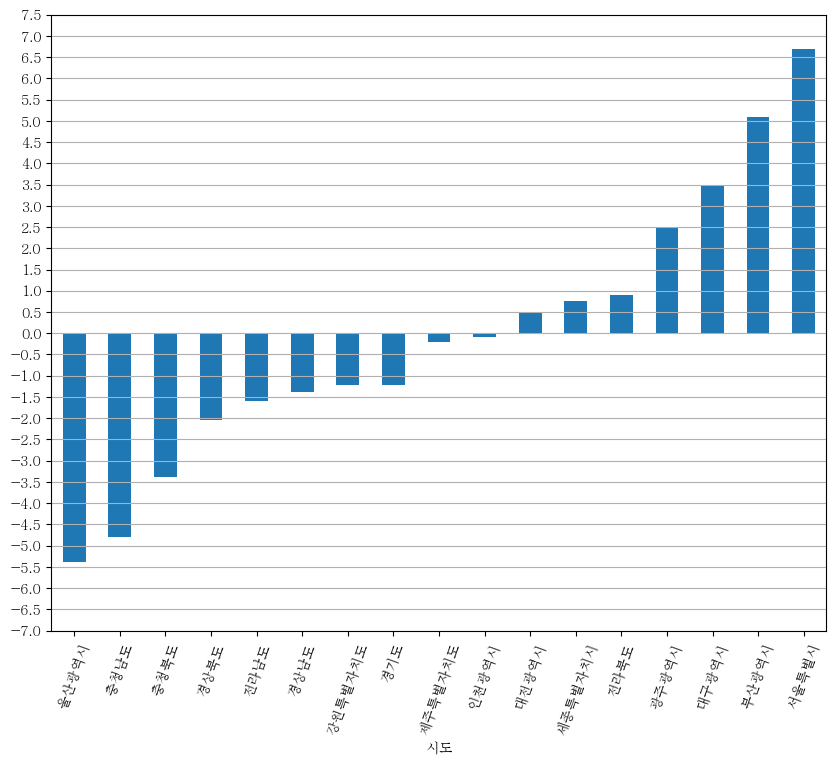

In [303]:
import matplotlib.pyplot as plt
#한글 처리를 위해
import matplotlib
matplotlib.rcParams['font.family']='batang'
sido_per.plot.bar(figsize=(10,8))
plt.grid(True, axis='y')
plt.xticks(rotation = 70)
plt.yticks([i/10 for i in range(-70,80,5)])
plt.show()